# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [48]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import squareform, pdist
import seaborn as sns

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [49]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [50]:
def max_three(data,sz) :
    # get all distances between points and make them square matrix
    sf = pd.DataFrame(squareform(pdist(data)))
    # build [max value index] + [max values]
    cm = pd.concat([pd.Series(range(0,data.shape[0])),sf.idxmax(), sf.max()], axis=1)
    #cm = pd.Series(sf.max());
    # sort by max values
    cm.sort_values(by=2,ascending=False,inplace=True)
    #cm.sort_values(ascending=False,inplace=True)
    return  cm.head(sz)#  first three stand the farthest apart 

max_three(data,5)

,0,1,2
181,181,85,128968.392709
85,85,181,128968.392709
333,333,181,123216.360285
125,125,85,120950.913519
65,65,181,118751.521586


In [51]:
# TODO: Select three indices of your choice you wish to sample from the dataset
#indices = [181,85,333] <- 181 possible outlier
indices = [125,85,333]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,76237,3473,7102,16538,778,918
1,16117,46197,92780,1026,40827,2944
2,8565,4980,67298,131,38102,1215


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Frozen: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

* First **(125)** is a big restaurant or hotel etc. They use a lot of fresh and frozen items to feed customers.
* Second **(82)** a grocery store with in store production. They are making something from milk.
* Third **(333)** Similar to **(82)** but smaller in scale and no use of milk for in-store production.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [52]:
fd_name = 'Delicatessen'

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop([fd_name],axis=1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
fd_feature = data[fd_name]
X_train, X_test, y_train, y_test = train_test_split(new_data, fd_feature, test_size = 0.25, random_state = 42)

# TODO: Create a decision tree regressor and fit it to the training set
# Define the model (with default hyperparameters)
regressor = DecisionTreeRegressor(random_state=42)
# Fit the model
regressor.fit(X_train, y_train)
# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)
score


-2.254711537203931

### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

* Which feature did you attempt to predict? `Delicatessen`
* What was the reported prediction score? `-2.25`
* Is this feature necessary for identifying customers' spending habits? `Yes`. I checked other features and this one turn out to be the most important : the most irrelevant seems to be a **Grocery** with score of **`0.68`**.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

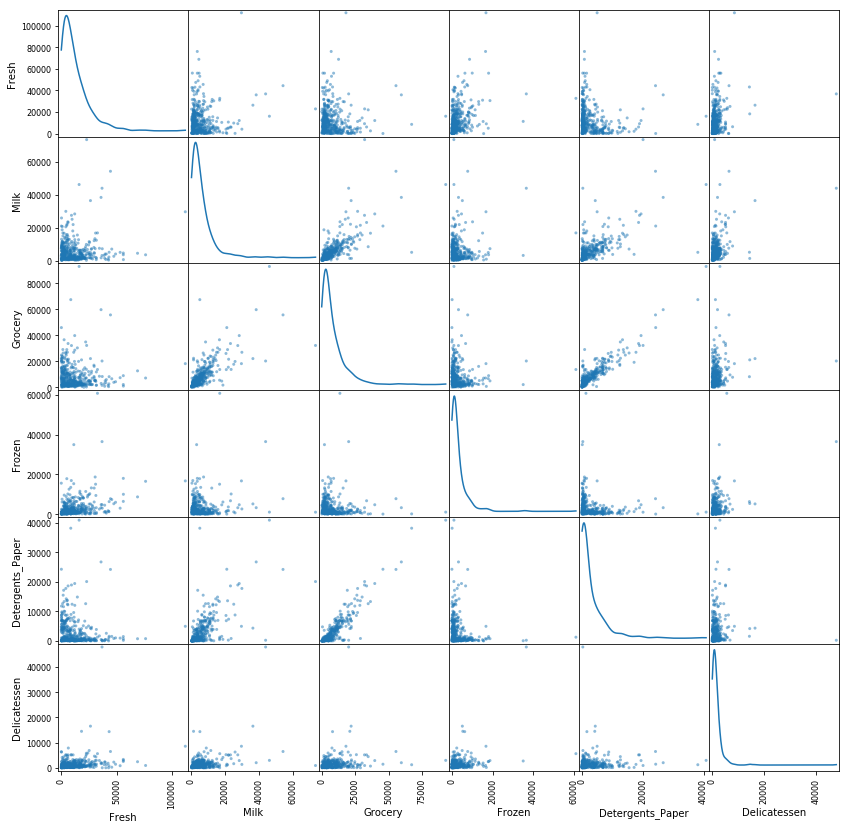

In [53]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.5, figsize = (14,14), diagonal = 'kde');

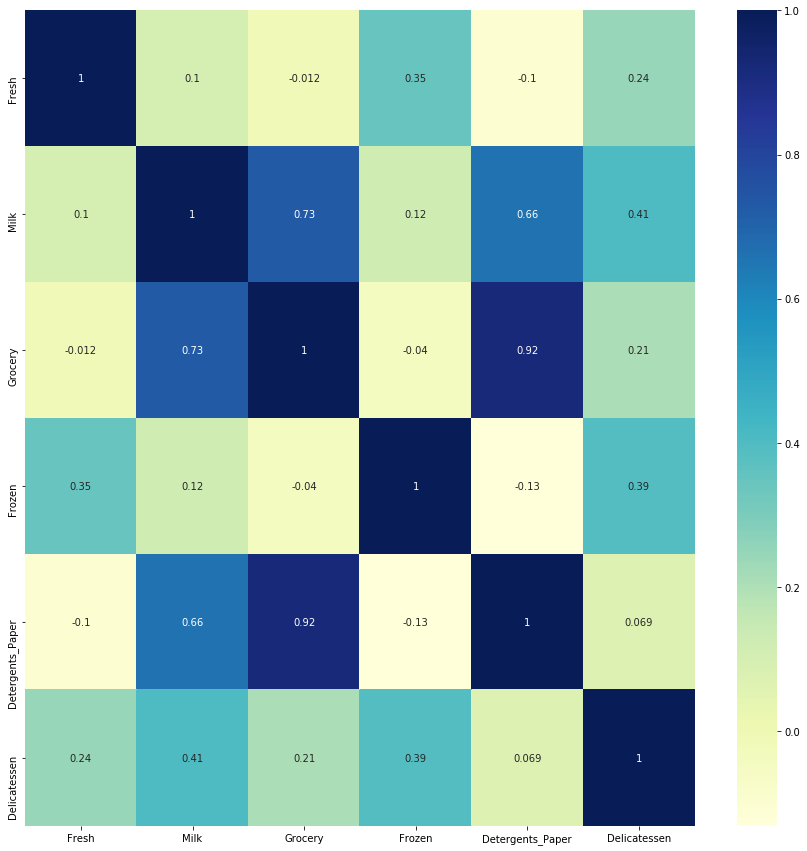

In [54]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu",ax=ax)

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

* Dataset have **normal distribution**. Diagonal subplots in scater_matrix plot produce a bell shape plots. Although these plots are not a perfect they are recognizable even with distortions and outliers.

* Yes. Following pairs are correlated

| Feature1 | Feature2 | Corelation coef. |
| -- | -- | -- |
| Milk | Grocery | 0.73 |
| Milk | Detergent Paper | 0.66 |
| Grocery | Detergent Paper | 0.92 |

* The feature I attempted to remove was ‘Delicatessen’. Delicatessen is not heavily correlated with anything and cannot be predicted from other features.

* Data for corrected features are distributed along a line, data for uncorrelated features can be shaped as blob of points or form two perpendicular lines (Detergent Paper and Frozen).

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

/home/pavlo/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


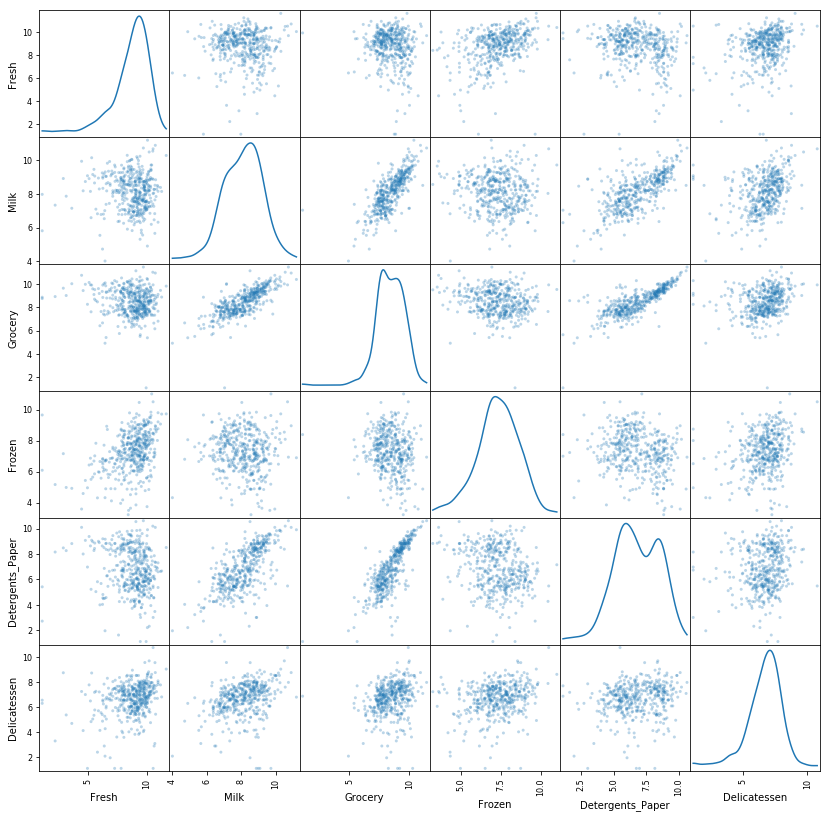

In [56]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,14), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

**The correlated features are still appeared correlated and form the extended blobs**

| Feature1 | Feature2 | Corelation coef. |
| -- | -- | -- |
| Milk | Grocery | 0.73 |
| Milk | Detergent Paper | 0.66 |
| Grocery | Detergent Paper | 0.92 |


In [57]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,11.241602,8.152774,8.868132,9.713416,6.656727,6.822197
1,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524
2,9.055439,8.513185,11.116886,4.875197,10.548022,7.102499


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [58]:
results = {}
results['union'] = set()
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():

    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],q = 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],q = 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = Q3 - Q1
    
    # Display the outliers
    #print("Data points considered outliers for the feature '{}':".format(feature))
    #display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    results[feature] = (log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index)
    results['union'] = results['union'].union(set(results[feature]))
    
# OPTIONAL: Select the indices for data points you wish to remove
#print(results)
outliers  = list(results['union'])
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

In [59]:
print(set(results['Grocery']).intersection(results['Delicatessen']))
print(set(results['Grocery']).intersection(results['Detergents_Paper']))
print(set(results['Grocery']).intersection(results['Frozen']))
print(set(results['Grocery']).intersection(results['Milk']))
print(set(results['Grocery']).intersection(results['Fresh']))
print("======================================================")
print(set(results['Fresh']).intersection(results['Delicatessen']))
print(set(results['Fresh']).intersection(results['Detergents_Paper']))
print(set(results['Fresh']).intersection(results['Frozen']))
print(set(results['Fresh']).intersection(results['Milk']))
print("======================================================")
print(set(results['Milk']).intersection(results['Delicatessen']))
print(set(results['Milk']).intersection(results['Detergents_Paper']))
print(set(results['Milk']).intersection(results['Frozen']))
print("======================================================")
print(set(results['Frozen']).intersection(results['Delicatessen']))
print(set(results['Frozen']).intersection(results['Detergents_Paper']))
print("======================================================")
print(set(results['Detergents_Paper']).intersection(results['Delicatessen']))
print("======================================================")
print("======================================================")
print(len(results['union']))
set(results['Frozen']).intersection(results['Delicatessen']).intersection(results['Milk'])

{154}
{161, 154, 75, 356}
{154, 333}
{356, 154, 47, 85, 122, 61}
set()
{128, 97, 66, 181, 184, 412}
{338}
{96, 65, 128, 357, 184, 412}
{97, 98}
{97, 289, 23, 183, 154, 191}
{154, 356}
{154, 183}
{128, 439, 183, 184, 154, 412}
{154}
{154}
94


{154, 183}

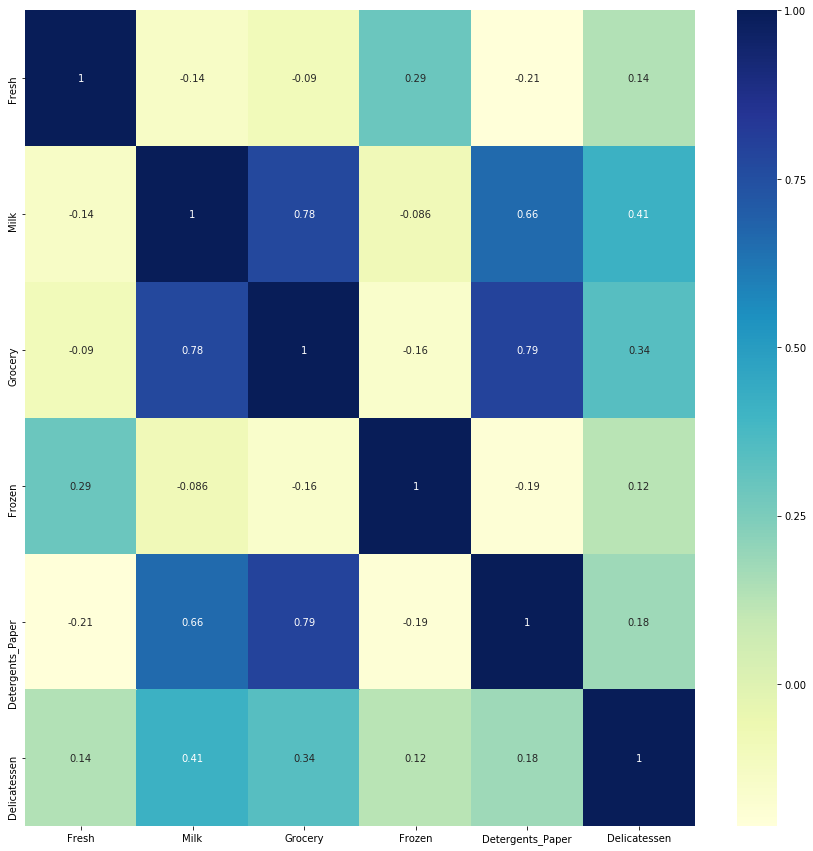

In [60]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(good_data.corr(), annot=True, cmap="YlGnBu",ax=ax)

/home/pavlo/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


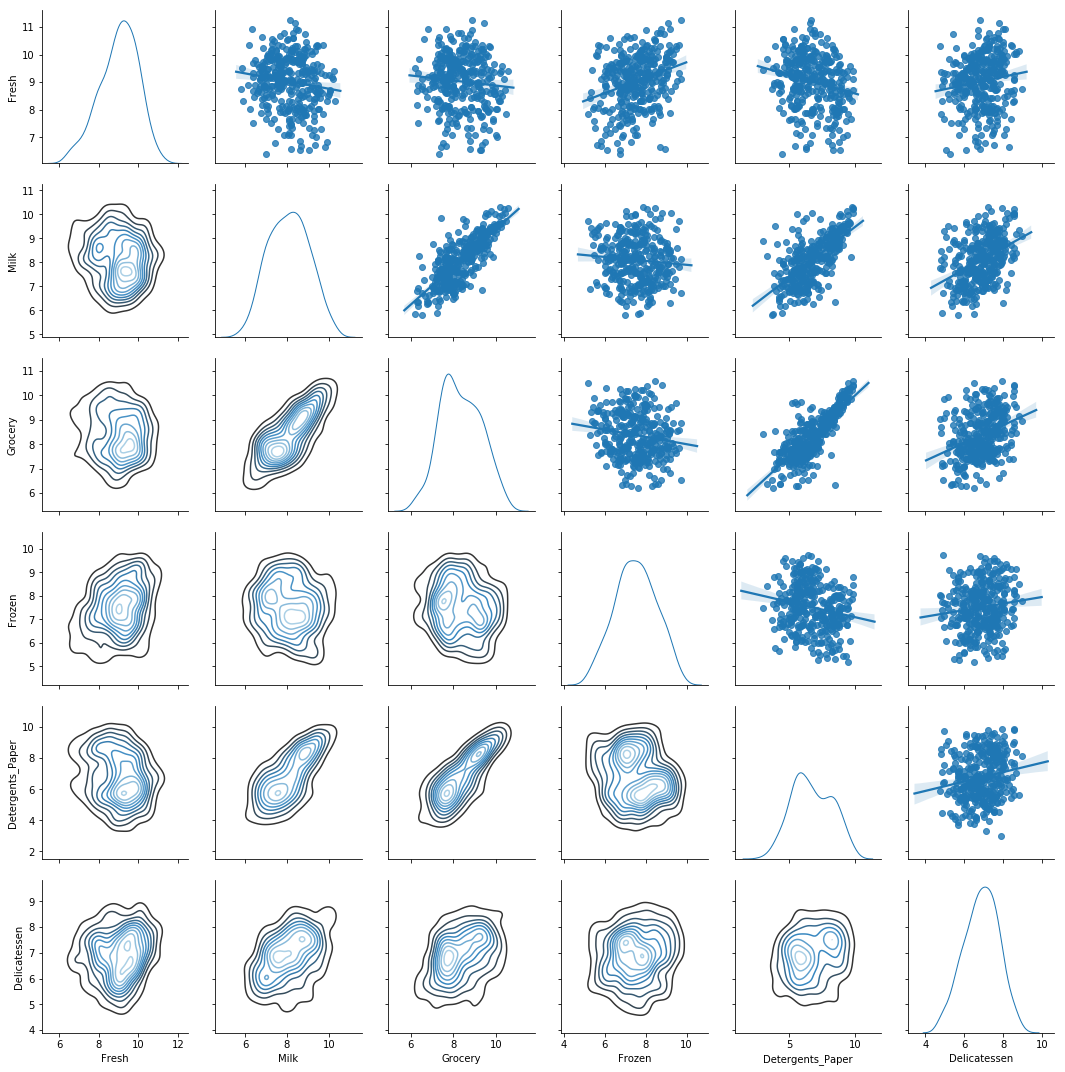

In [61]:
#sns.pairplot(data, kind="reg",diag_kind="kde")
g = sns.PairGrid(good_data)
g = g.map_upper(sns.regplot)
g = g.map_lower(sns.kdeplot, cmap="Blues_d")
#g = g.map_lower(sns.residplot)
g = g.map_diag(sns.kdeplot, lw=1, legend=False)

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

* Yes. For example between “Frozen” and “Delicatessen “ there are **6 common outliers**. 
Between “Frozen”, ”Delicatessen” and ”Milk” **2 common outliers**.


* I would preferred to **remove all ouliers**, regardless if they are just a single or multiple categories outlier. 
Why is this. Oulier is data in extreme to analyze our data we are using mathematical relationships and algorithms to 
detect and explain these relationships. Detection of trends and dependencies are effected by skewed data. For 
example K-Mean: important feature of K-mean is location of the centre of the cluster. Outliers located far away will 
“pull” centre toward them etc. 


* Yes: 94 points were added to the oulier list and removed from dataset. The reason for the oulier removal 
that they are distorting “knowledge” which we want to uncover, skewing relationships between data and negatively 
affecting our analysis. 

  If there is any **value** in ouliers ? Yes ouliers are useful for example after we analyzed our data we can check  
  ouliers to see why they are ouliers. Data which doesn't fit is valuable and can provide insight into something new  
  or uncover trend or relationship which was not thought about before. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

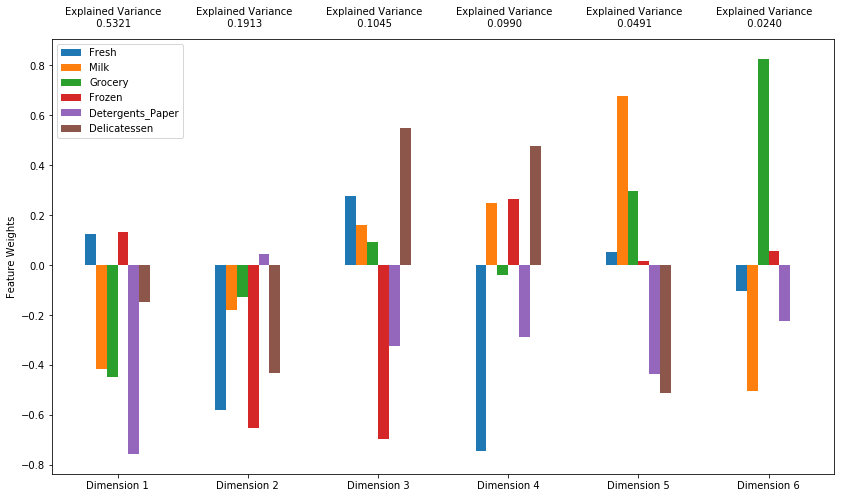

In [62]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
n_components = len(good_data.keys())
pca = PCA(n_components=n_components)
pca = pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

* How much variance in the data is explained **in total** by the first and second principal component? (**0.7234** = 0.5321 + 0.1913)
* How much variance in the data is explained by the first four principal components? (**0.9269** = 0.5321+0.1913+0.1045+0.0990)


Recall : Each dimension is a best representation of the direction for the component of the variance. Each dimension consist from features which add to the direction. First dimension is the direction of the biggest variance, second is second biggest etc. How features add to the dimension?

* **Dimension 1**: It consist from two groups of features: `Group one` **“Milk, Grocery Detergents_Paper, Delicatessen”** and `group two` **“Fresh, Frozen”**. From plot we can see that these groups move in opposite direction (especially when look at their contribution to Dimension 1 and Dimension 2).
These features **“Milk, Grocery Detergents_Paper”** and **“Fresh, Frozen”** will create our first two groups of the customer spending profiles.


* **Dimension 2**: It consist from two groups of features: `Group one` **“Milk, Grocery Detergents_Paper”** and `group two` **“Fresh, Frozen”**. The difference from Dimension 1 is that weight of group two **“Fresh, Frozen”** is `increased`. (Or decrease of the negative-weighted features). Still two spending profiles.


* **Dimension 3**: It consist from two groups of features: `Group one` **“Fresh,Milk, Grocery, Delicatessen”** and `group two` **“Detergents_Paper, Frozen”**.  Looking at this dimension and two previous ones we see that here we have spending profile along **“Delicatessen, Milk, Grocery”** with  Delicatessen as **primary** component.


* **Dimension 4**: It consist from two groups of features: `Group one` **“Milk, Frozen, Delicatessen”** and `group two` **“Fresh, Detergents_Paper, Grocery”**.  Looking at this dimension and three previous ones we see that here we have spending profile along “Frozen, Milk” with  Frozen as primary component.


  From these four dimensions we can derive following **spending groups** : **“Milk, Grocery Detergents_Paper, Delicatessen” 
  with **Detergents_Paper** as **primary** component, **“Fresh, Frozen”** with no primary component, **“Delicatessen, Milk, 
  Grocery”** with **Delicatessen** as **primary** component, **“Frozen, Milk”**  with **Frozen** as primary component

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [63]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.4129,-2.7744,-0.8459,-1.0692,0.4172,0.2946
1,-5.5432,-1.1634,0.6572,-0.6793,0.4785,0.2440
2,-4.6447,1.3641,1.0574,-1.7005,-0.7124,1.0640


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [64]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca_r = PCA(n_components=2)

# TODO: Transform the good data using the PCA fit above
pca_r = pca_r.fit(good_data)
reduced_data = pca_r.transform(good_data)
# TODO: Transform log_samples using the PCA fit above
pca_samples = pca_r.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [65]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,0.4129,-2.7744
1,-5.5432,-1.1634
2,-4.6447,1.3641


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

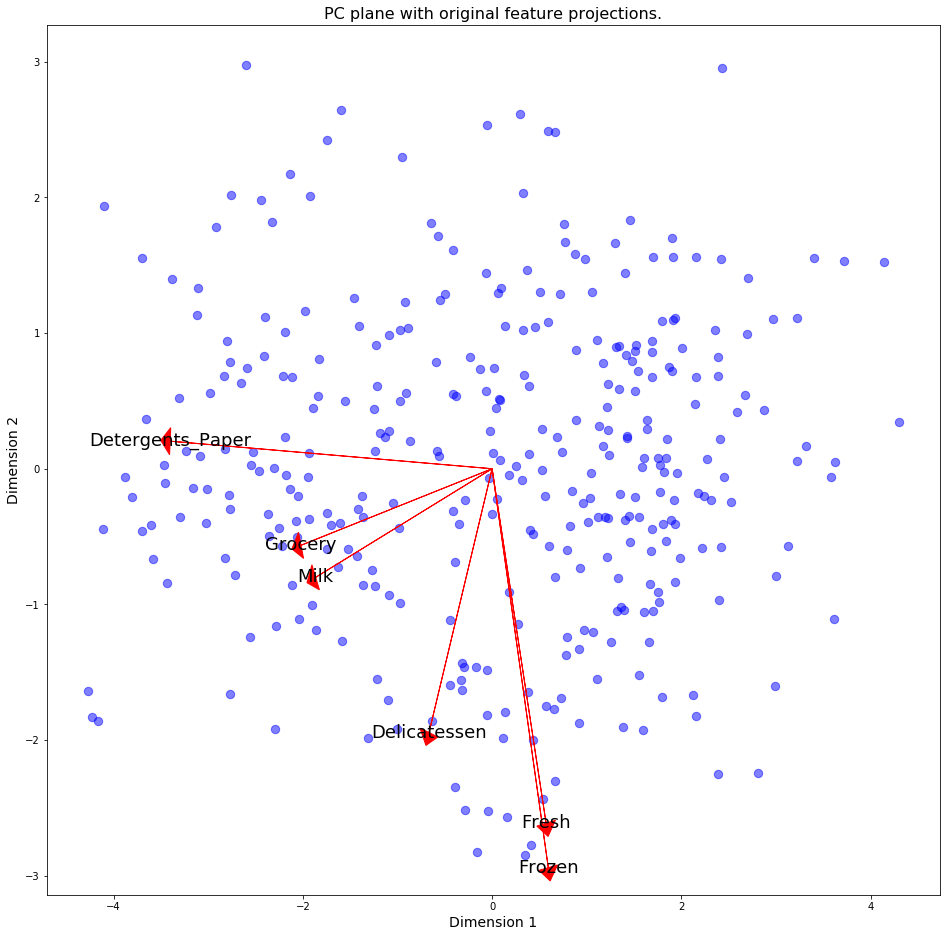

In [66]:
# Create a biplot
def biplot1(good_data, reduced_data, pca):
    '''
    Produce a biplot that shows a scatterplot of the reduced
    data and the projections of the original features.
    
    good_data: original data, before transformation.
               Needs to be a pandas dataframe with valid column names
    reduced_data: the reduced data (the first two dimensions are plotted)
    pca: pca object that contains the components_ attribute

    return: a matplotlib AxesSubplot object (for any additional customization)
    
    This procedure is inspired by the script:
    https://github.com/teddyroland/python-biplot
    '''

    fig, ax = plt.subplots(figsize = (16,16))
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], 
        facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 4.5, 4.5,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.2, head_length=0.1, linewidth=1, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, good_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax

biplot1(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

* What are the advantages to using a K-Means clustering algorithm?
   * simple, easy to implement;
   * easy to interpret the clustering results;
   * fast and efficient in terms of computational cost, typically $O(K*n*d)$;


* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
  * Soft clustering (sample membership of multiple clusters)
  * Cluster shape flexibility.


* I will use Gaussian Mixture Model.Gaussian Mixture Model provide a soft clustering which is the advantage when we have a degree of uncertainty in our results interpretation. For example if spending patters is similar to the Grocery store it is not a stretch to assume that some stores can have a kitchen on premises, and will sell not just a Grocery and Detergents_Paper but a cooked meals (Fresh, Frozen, Delicatessen).  Same logic can be true for the Restaurant with a gift shop which sells locally made cheese (consume huge quantities of milk). This will create a variation in consumer spending patterns which can be better captured by applying a Gaussian Mixture Model soft clustering.



### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [67]:
# TODO: Import GaussianMixture
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters_in=3

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer_g = GaussianMixture(n_components=n_clusters_in).fit(reduced_data)
clusterer_k = KMeans(n_clusters=n_clusters_in).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds_g = clusterer_g.predict(reduced_data)
preds_k = clusterer_k.predict(reduced_data)

# TODO: Find the cluster centers
centers_g = clusterer_g.means_
centers_k = clusterer_k.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds_g = clusterer_g.predict(pca_samples)
sample_preds_k = clusterer_k.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score_k = silhouette_score(reduced_data, preds_k)
score_g = silhouette_score(reduced_data, preds_g)

print(score_k,score_g)

0.3823163128899939 0.3904992488614803


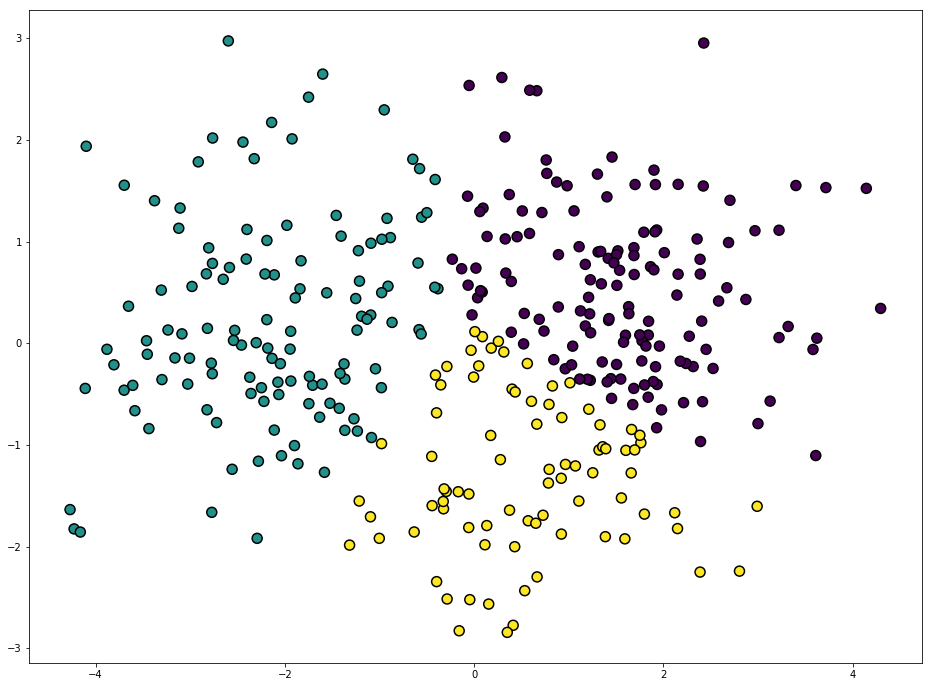

In [68]:
plt.figure( figsize=(16,12))
plt.scatter(reduced_data['Dimension 1'], reduced_data['Dimension 2'], c=preds_k, edgecolor='black', lw=1.5, s=100, cmap=plt.get_cmap('viridis'))
plt.show()

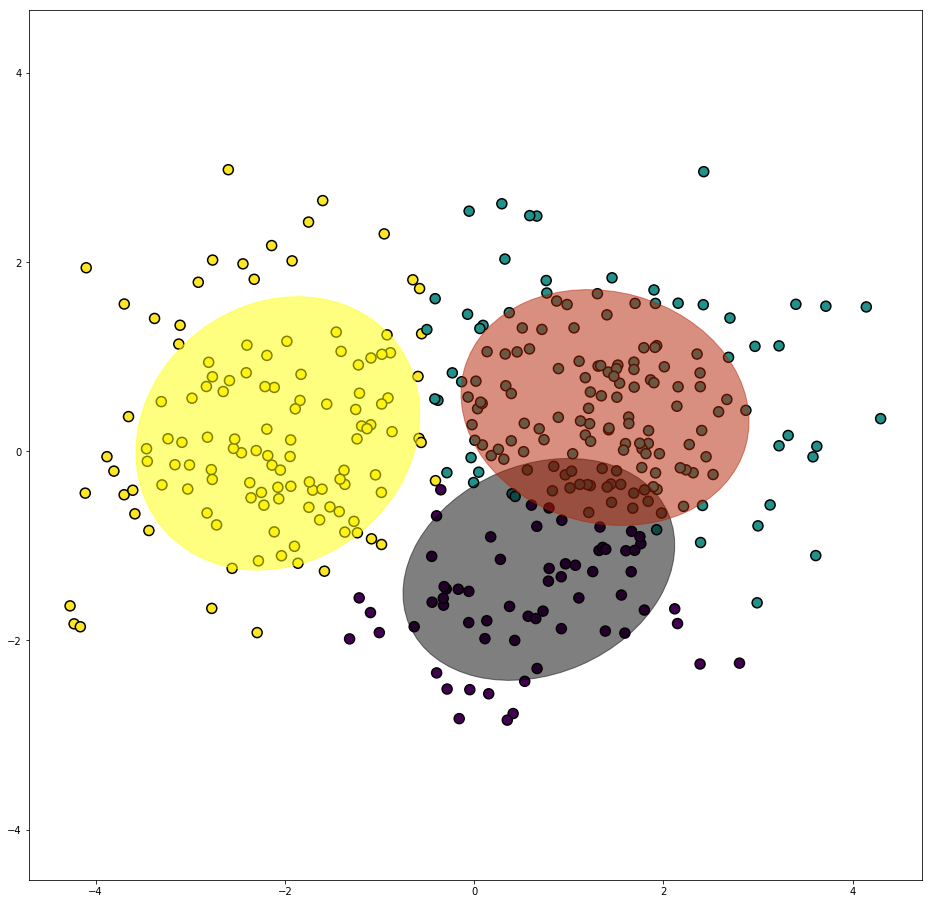

In [69]:
import matplotlib as mpl

def make_ellipses(gmm, ax):
    # from make GaussianMixture example
    color = plt.cm.get_cmap('gnuplot', gmm.covariances_.shape[0])
    for n in range(gmm.covariances_.shape[0]):
        covariances = gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1], 180 + angle, color=color(n))
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

fig, ax = plt.subplots(figsize = (16,16))
plt.scatter(reduced_data['Dimension 1'], reduced_data['Dimension 2'], c=preds_g, edgecolor='black', lw=1.5, s=100, cmap=plt.get_cmap('viridis'))
make_ellipses(clusterer_g,ax)
plt.show()

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

| n-Clusters  | Silhouette (k-Mean)  | Silhouette (GM) |
| -  | - | - | 
| 2  | 0.468 | 0.467 |
| 3  | 0.382  | 0.390 |
| 4  | 0.379 | 0.359|
| 5  | 0.356  | 0.347 |

Best score: With 2 clusters

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

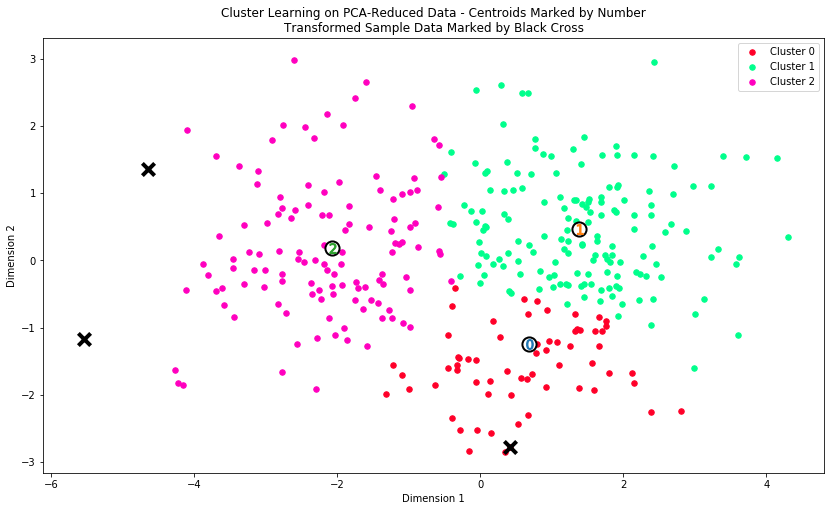

In [70]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds_g, centers_g, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [71]:
# TODO: Inverse transform the centers
log_centers_g = pca_r.inverse_transform(centers_g)
log_centers_k = pca_r.inverse_transform(centers_k)

# TODO: Exponentiate the centers
true_centers_g = np.exp(log_centers_g)
true_centers_k = np.exp(log_centers_k)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers_g))]
true_centers = pd.DataFrame(np.round(true_centers_g), columns = data.keys())
true_centers.index = segments
display(np.round(true_centers_g,3))

array([[18743.569,  3096.582,  3724.325,  4567.182,   486.438,  1498.617],
       [ 7585.057,  1709.65 ,  2195.835,  1637.735,   309.728,   645.051],
       [ 5733.72 ,  7521.998, 10728.917,  1240.647,  4180.082,  1211.866]])

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

Answer:

Fresh: 12000.2977
Milk: 5796.2
Grocery: 7951.3
Frozen: 3071.9
Detergents_paper: 2881.4
Delicatessen: 1524.8

 * Cluster 0 :	**Industrial establishment.** (Hotel, factory, etc)
 * Cluster 1 :	**Restaurant cafe.** 
 * Cluster 2 :	**Grocery store.** 




### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [72]:
# Display the predictions
for i, pred in enumerate(sample_preds_g):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 2
Sample point 2 predicted to be in Cluster 2


**Answer:**

* Sample 0 - **Cluster 0**: **Industrial establishment**. Initially it was predicted that this customer is from Industrial Establishment. The key insight for this prediction is heavy use of **“Fresh”** and **“Frozen”** and below average use of "Milk" and "Delicatessen". This would be consistent when in-house kitchen is used (like army barracks, or big hotel). Establishment need to deliver nutrient food in big quantities fast and cheap. So there is a lot of demand for “Fresh” and “Frozen” (need to cook a lot and cheap) low demand for “Delicatessen” and “Milk” (just enough to put something in tea or coffee + yogourts to take out)
and almost no demand for “Detergents_Paper” (well they still need napkins).


* Sample 1,2 - **Cluster 2** : Initially it was predicted that Sample 1 is a **grocery store with in store production using milk** and second sample is a **grocery store without in store production**.
According to our analysis whole Cluster 2 is a grocery store with in store production using milk. 
So we can adjust our prediction as follow :

  * Sample 1 is a grocery store with in store production using milk (cheese,ice cream)
  * Sample 2 is a grocery store with in store production using milk (cakes, bread, bakery)

  The key insight for prediction **Grocery Store with in store production using milk**, is heavy use of **“Grocery”** **“Milk”** and **“Detergents_Paper”** features and below average use of “Fresh” and “Frozen”. This would be consistent for a profile of the store which resell things and not uses lots of food to cook. Huge use of milk will indicate that milk there was not just sold but used for in-store production like cooking or making cheese. These two profiles also sell lots of  **“Delicatessen”** this reinforce our conclusion that they are reselling things as “Delicatessen” is a final product and not an ingredient.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

* **Yes** it can. Customers from **Segment 0** which uses lots of **“Fresh”** and **"Frozen"** items will benefit from changing delivery schedule. Customers can benefit by reducing refrigerating capacity. (They simply will need less fridges). Not all the customers will be equally affected. Segment 0 will include an boundary customers with weak demand for **“Fresh”** and **"Frozen"**. 

  On other side there can be a customers which are using lot of **"Milk"** primary for sale (not for production) and they can also benefit from a reduced fridges. They may not belong in Segment 0 but instead in Segment 2 (boundary customers). (Although here we need to remember that milk is a liquid and liquids are non compressible and already occupying minimal volume per weight so those fridge reduction may to be so great.)


* `A/B test` will have best impact on customers from **Segment 0**.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

As hint suggest

* Create a new engineered feature : `customer segment`. This feature will reflect on already existing segments obtained through unsupervised learning clustering algorithm.


* Analyze and put more insight descriptions about discovered by unsupervised learning segments: like `industrial` segment, `restaurant  and cafes` segment, `stores` (big, medium, small) segment, etc. Feature is engineered we need a better understanding and description what it represent.


* Add engineered feature to the Features list and populate it with codes (0 – industrial customers, 1 - restaurant  and cafes, 2 – stores … etc)


* Run supervised learning algorithm with `customer segment` as target variable and see what our outcome is. We need to reach agreement between our unsupervised clustering and supervised learning methods.


* Try different supervised learning techniques and analyze result. if everything is predicted consistency: it is good. If supervised learners are failing, it is good to: there is some trouble in our methods and we need to dig deeper.


* Using best supervised learner we can analyze new data and assigned segments to the new customers using `customer segment` as target variable.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

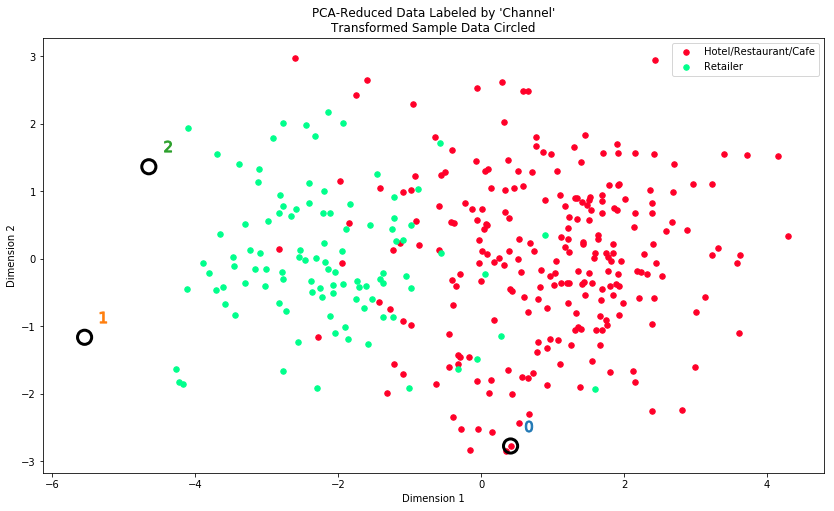

In [73]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.